# Separate inversion of coefficients
17/08/2022

By: Monica AQUINO 

## Content: 

    1.0 Circular test 
    2.0 Well log data 
    3.0 Random well log data 
    



In [18]:
#Load modules 

import numpy as np
import matplotlib.pyplot as plt 

import sys 
sys.path.insert(1,'C:/Users/monic/Documents/PhD/ABSTRACTS/Manuscript/github/functions/')
from _helpers import read_model
from aijfunctions import acompute2, acompute3

##  1.0 Circular test 

We try to solve for the coefficients using the polynomial form that describes a circunference i.e. -m_1^2-m_2^2=-1


In [33]:
#read model 

model=np.loadtxt('circunference.txt')


In [34]:
#Assign values and add errors to the model 

res=model[:,0]
vs=model[:,1]

np.random.seed(0) 
random1=np.random.uniform(1.0,1.05,len(vs))
res1=res*random1
vs1=vs*random1
np.random.seed(0) 
random2=np.random.uniform(1.0,1.1,len(vs))
res2=res*random2
vs2=vs*random2


In [ ]:


gp2d2,a22,rms22=acompute2(vs,res,deg=2)
a22=1*np.ones(len(a22))

#Target g obs
Dobs=g0=-1*np.ones(len(vs)) 


#Compute separate inversions  
inv_data0,inv_m0,rms0=acompute2(vs,res,deg=2)
inv_data1,inv_m1,rms1=acompute2(vs1,res1,deg=2)

#True coefficients for plotting purposes 
m_coefficients=np.zeros(len(inv_m0))
m_coefficients[1]=-1
m_coefficients[5]=-1


##  2.0 Well log data

Separate inversion of coefficients using well log data 

In [19]:
#read well log 

input=read_model('model_well4.txt')


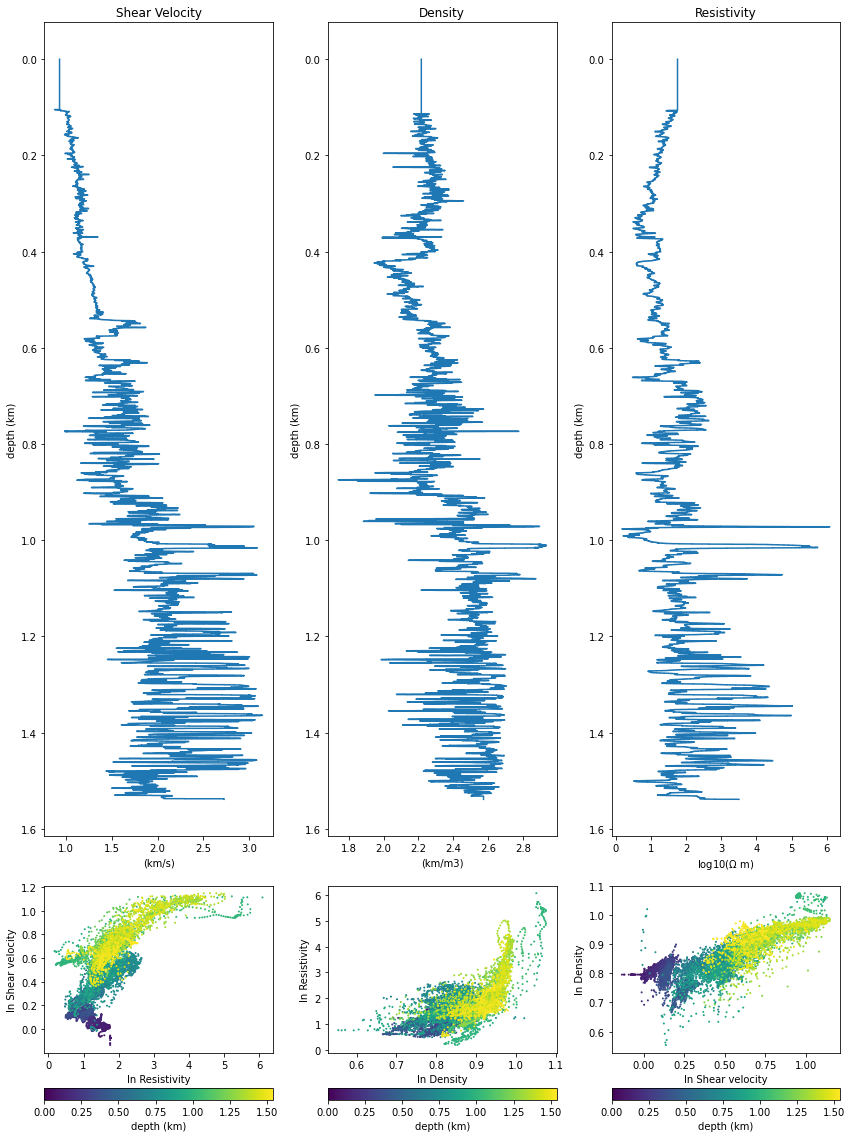

In [14]:
#Plot well log 

z1=np.zeros(len(input.velocity_model[:,0]))
z1[1:len(z1)]=np.cumsum(input.velocity_model[0:(len(z1)-1),0])

#Plots! 
fig1 = plt.figure(figsize=(12,16))
ax1 = plt.subplot2grid((4,3), (0,0), rowspan=3,fig=fig1)
ax2 = plt.subplot2grid((4,3), (0,1), rowspan=3,fig=fig1)
ax3 = plt.subplot2grid((4,3), (0,2), rowspan=3,fig=fig1)

ax4 = plt.subplot2grid((4,3), (3,0),fig=fig1)
ax5 = plt.subplot2grid((4,3), (3,1),fig=fig1)
ax6 = plt.subplot2grid((4,3), (3,2),fig=fig1)


ax1.step((input.velocity_model[:,2]),z1,)
ax1.invert_yaxis()
ax1.set_title('Shear Velocity')
ax1.set_ylabel('depth (km)')
ax1.set_xlabel('(km/s)')

ax2.step((input.velocity_model[:,3]),z1)
ax2.invert_yaxis()
ax2.set_title('Density')
ax2.set_ylabel('depth (km)')
ax2.set_xlabel('(km/m3)')


ax3.step(np.log(input.resistivity_model[:,1]),z1)
ax3.invert_yaxis()
ax3.set_title('Resistivity')
ax3.set_ylabel('depth (km)')
ax3.set_xlabel('log10($\Omega$ m)')



prime1=ax4.scatter(np.log(input.resistivity_model[:,1]),np.log(input.velocity_model[:,2]),c=z1,cmap='viridis',s=1)
ax4.set_xlabel('ln Resistivity')
ax4.set_ylabel('ln Shear velocity')
cbar1=fig1.colorbar(prime1,ax=ax4, orientation='horizontal')
cbar1.set_label('depth (km)')


prime2=ax5.scatter(np.log(input.velocity_model[:,3]),np.log(input.resistivity_model[:,1]),c=z1,cmap='viridis',s=1)
ax5.set_xlabel('ln Density')
ax5.set_ylabel('ln Resistivity')
cbar2=fig1.colorbar(prime2,ax=ax5, orientation='horizontal')
cbar2.set_label('depth (km)')


prime3=ax6.scatter(np.log(input.velocity_model[:,2]),np.log(input.velocity_model[:,3]),c=z1,cmap='viridis',s=1)
cbar3=fig1.colorbar(prime3,ax=ax6, orientation='horizontal')
cbar3.set_label('depth (km)')


ax6.set_xlabel('ln Shear velocity')
ax6.set_ylabel('ln Density')

plt.tight_layout()

In [22]:
#Compute estimations of coefficients 


g0=-1*np.ones(len(input.velocity_model)) #target coefficients 
gp2d1_1,a21_1,rms21_1=acompute2(np.log(input.velocity_model[:,2]),np.log(input.resistivity_model[:,1]),deg=1)
gp2d2_1,a22_1,rms22_1=acompute2(np.log(input.velocity_model[:,2]),np.log(input.resistivity_model[:,1]),deg=2)

gp2d1_2,a21_2,rms21_2=acompute2(np.log(input.velocity_model[:,3]),np.log(input.resistivity_model[:,1]),deg=1)
gp2d2_2,a22_2,rms22_2=acompute2(np.log(input.velocity_model[:,3]),np.log(input.resistivity_model[:,1]),deg=2)

gp2d1_3,a21_3,rms21_3=acompute2(np.log(input.velocity_model[:,2]),np.log(input.velocity_model[:,3]),deg=1)
gp2d2_3,a22_3,rms22_3=acompute2(np.log(input.velocity_model[:,2]),np.log(input.velocity_model[:,3]),deg=2)

gp3d1,a31,rms31=acompute3(np.log(input.velocity_model[:,2]),np.log(input.resistivity_model[:,1]),np.log(input.velocity_model[:,3]),deg=1)
gp3d2,a32,rms32=acompute3(np.log(input.velocity_model[:,2]),np.log(input.resistivity_model[:,1]),np.log(input.velocity_model[:,3]),deg=2)



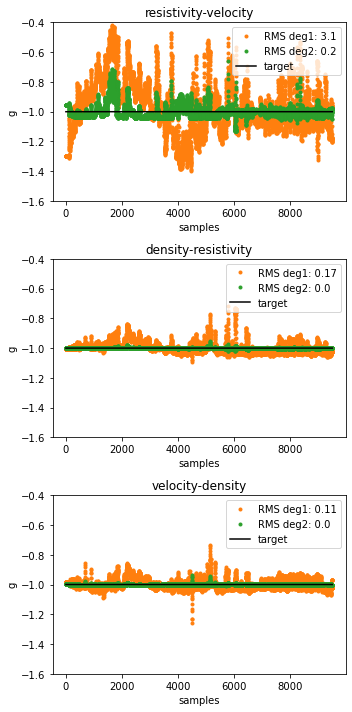

In [23]:
#Plot results 



fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.plot(gp2d1_1,'o',label='RMS deg1: '+str(round(rms21_1*100,2)),markersize=3,color='#ff7f0e')
ax1.plot(gp2d2_1,'o',label='RMS deg2: '+str(round(rms22_1*100,2)),markersize=3,color='#2ca02c')
#ax1.plot(gp3d1,'o',label='p3deg1',markersize=3)
#ax1.plot(gp3d2,'o',label='p3deg2',markersize=3)
ax1.plot(g0,label='target',color='black')
ax1.set_ylim([-1-0.6, -1+0.6])
ax1.set_ylabel('g')
ax1.set_xlabel('samples')
ax1.set_title('resistivity-velocity')
ax1.legend(loc=1)


ax2.plot(gp2d1_2,'o',label='RMS deg1: '+str(round(rms21_2*100,2)),markersize=3,color='#ff7f0e')
ax2.plot(gp2d2_2,'o',label='RMS deg2: '+str(round(rms22_2*100,2)),markersize=3,color='#2ca02c')
#ax2.plot(gp3d1,'o',label='p3deg1',markersize=3)
#ax2.plot(gp3d2,'o',label='p3deg2',markersize=3)
ax2.plot(g0,label='target',color='black')
ax2.set_ylim([-1-0.6, -1+0.6])
ax2.set_ylabel('g')
ax2.set_xlabel('samples')
ax2.set_title('density-resistivity')
ax2.legend(loc=1)


ax3.plot(gp2d1_3,'o',label='RMS deg1: '+str(round(rms21_3*100,2)),markersize=3,color='#ff7f0e')
ax3.plot(gp2d2_3,'o',label='RMS deg2: '+str(round(rms22_3*100,2)),markersize=3,color='#2ca02c')
#ax3.plot(gp3d1,'o',label='p3deg1',markersize=3)
#ax3.plot(gp3d2,'o',label='p3deg2',markersize=3)
ax3.plot(g0,label='target',color='black')
ax3.set_ylim([-1-0.6, -1+0.6])
ax3.legend(loc=1)
ax3.set_ylabel('g')
ax3.set_xlabel('samples')
ax3.set_title('velocity-density')
plt.tight_layout()

plt.show()


##  3.0 Random well log data

Separate inversion of coefficients using random well log data 

In [29]:
#read well log random 

input=read_model('model_well4random.txt')
input.velocity_model[:,3]=np.random.uniform(1.0,3.5,len(input.velocity_model))[:]


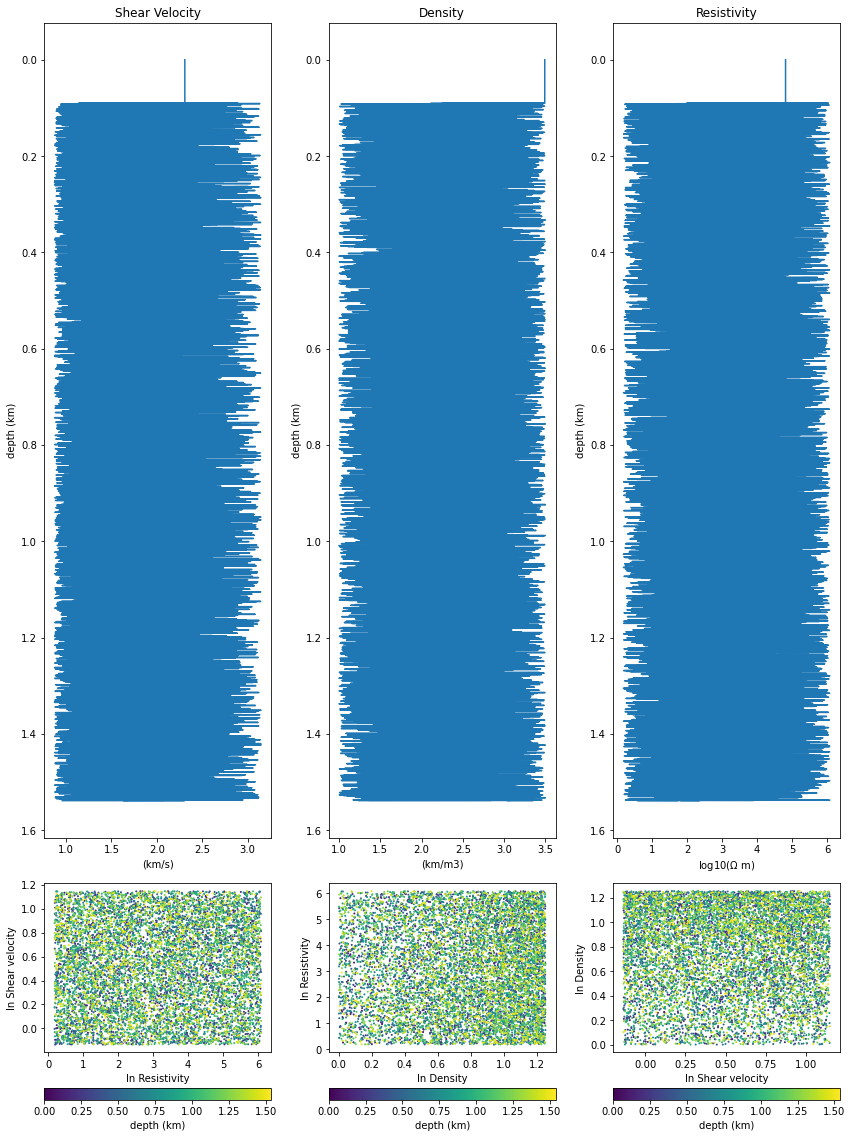

In [30]:
#Plot well log 

z1=np.zeros(len(input.velocity_model[:,0]))
z1[1:len(z1)]=np.cumsum(input.velocity_model[0:(len(z1)-1),0])

#Plots! 
fig1 = plt.figure(figsize=(12,16))
ax1 = plt.subplot2grid((4,3), (0,0), rowspan=3,fig=fig1)
ax2 = plt.subplot2grid((4,3), (0,1), rowspan=3,fig=fig1)
ax3 = plt.subplot2grid((4,3), (0,2), rowspan=3,fig=fig1)

ax4 = plt.subplot2grid((4,3), (3,0),fig=fig1)
ax5 = plt.subplot2grid((4,3), (3,1),fig=fig1)
ax6 = plt.subplot2grid((4,3), (3,2),fig=fig1)


ax1.step((input.velocity_model[:,2]),z1,)
ax1.invert_yaxis()
ax1.set_title('Shear Velocity')
ax1.set_ylabel('depth (km)')
ax1.set_xlabel('(km/s)')

ax2.step((input.velocity_model[:,3]),z1)
ax2.invert_yaxis()
ax2.set_title('Density')
ax2.set_ylabel('depth (km)')
ax2.set_xlabel('(km/m3)')


ax3.step(np.log(input.resistivity_model[:,1]),z1)
ax3.invert_yaxis()
ax3.set_title('Resistivity')
ax3.set_ylabel('depth (km)')
ax3.set_xlabel('log10($\Omega$ m)')



prime1=ax4.scatter(np.log(input.resistivity_model[:,1]),np.log(input.velocity_model[:,2]),c=z1,cmap='viridis',s=1)
ax4.set_xlabel('ln Resistivity')
ax4.set_ylabel('ln Shear velocity')
cbar1=fig1.colorbar(prime1,ax=ax4, orientation='horizontal')
cbar1.set_label('depth (km)')


prime2=ax5.scatter(np.log(input.velocity_model[:,3]),np.log(input.resistivity_model[:,1]),c=z1,cmap='viridis',s=1)
ax5.set_xlabel('ln Density')
ax5.set_ylabel('ln Resistivity')
cbar2=fig1.colorbar(prime2,ax=ax5, orientation='horizontal')
cbar2.set_label('depth (km)')


prime3=ax6.scatter(np.log(input.velocity_model[:,2]),np.log(input.velocity_model[:,3]),c=z1,cmap='viridis',s=1)
cbar3=fig1.colorbar(prime3,ax=ax6, orientation='horizontal')
cbar3.set_label('depth (km)')


ax6.set_xlabel('ln Shear velocity')
ax6.set_ylabel('ln Density')

plt.tight_layout()

In [31]:
#Compute estimations of coefficients 


g0=-1*np.ones(len(input.velocity_model)) #target coefficients 
gp2d1_1,a21_1,rms21_1=acompute2(np.log(input.velocity_model[:,2]),np.log(input.resistivity_model[:,1]),deg=1)
gp2d2_1,a22_1,rms22_1=acompute2(np.log(input.velocity_model[:,2]),np.log(input.resistivity_model[:,1]),deg=2)

gp2d1_2,a21_2,rms21_2=acompute2(np.log(input.velocity_model[:,3]),np.log(input.resistivity_model[:,1]),deg=1)
gp2d2_2,a22_2,rms22_2=acompute2(np.log(input.velocity_model[:,3]),np.log(input.resistivity_model[:,1]),deg=2)

gp2d1_3,a21_3,rms21_3=acompute2(np.log(input.velocity_model[:,2]),np.log(input.velocity_model[:,3]),deg=1)
gp2d2_3,a22_3,rms22_3=acompute2(np.log(input.velocity_model[:,2]),np.log(input.velocity_model[:,3]),deg=2)

gp3d1,a31,rms31=acompute3(np.log(input.velocity_model[:,2]),np.log(input.resistivity_model[:,1]),np.log(input.velocity_model[:,3]),deg=1)
gp3d2,a32,rms32=acompute3(np.log(input.velocity_model[:,2]),np.log(input.resistivity_model[:,1]),np.log(input.velocity_model[:,3]),deg=2)



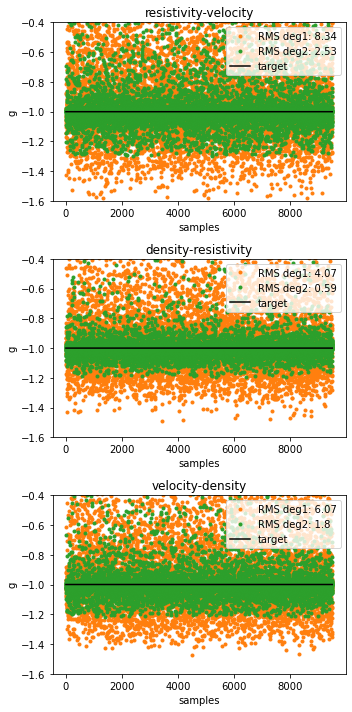

In [32]:
#Plot results 



fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.plot(gp2d1_1,'o',label='RMS deg1: '+str(round(rms21_1*100,2)),markersize=3,color='#ff7f0e')
ax1.plot(gp2d2_1,'o',label='RMS deg2: '+str(round(rms22_1*100,2)),markersize=3,color='#2ca02c')
#ax1.plot(gp3d1,'o',label='p3deg1',markersize=3)
#ax1.plot(gp3d2,'o',label='p3deg2',markersize=3)
ax1.plot(g0,label='target',color='black')
ax1.set_ylim([-1-0.6, -1+0.6])
ax1.set_ylabel('g')
ax1.set_xlabel('samples')
ax1.set_title('resistivity-velocity')
ax1.legend(loc=1)


ax2.plot(gp2d1_2,'o',label='RMS deg1: '+str(round(rms21_2*100,2)),markersize=3,color='#ff7f0e')
ax2.plot(gp2d2_2,'o',label='RMS deg2: '+str(round(rms22_2*100,2)),markersize=3,color='#2ca02c')
#ax2.plot(gp3d1,'o',label='p3deg1',markersize=3)
#ax2.plot(gp3d2,'o',label='p3deg2',markersize=3)
ax2.plot(g0,label='target',color='black')
ax2.set_ylim([-1-0.6, -1+0.6])
ax2.set_ylabel('g')
ax2.set_xlabel('samples')
ax2.set_title('density-resistivity')
ax2.legend(loc=1)


ax3.plot(gp2d1_3,'o',label='RMS deg1: '+str(round(rms21_3*100,2)),markersize=3,color='#ff7f0e')
ax3.plot(gp2d2_3,'o',label='RMS deg2: '+str(round(rms22_3*100,2)),markersize=3,color='#2ca02c')
#ax3.plot(gp3d1,'o',label='p3deg1',markersize=3)
#ax3.plot(gp3d2,'o',label='p3deg2',markersize=3)
ax3.plot(g0,label='target',color='black')
ax3.set_ylim([-1-0.6, -1+0.6])
ax3.legend(loc=1)
ax3.set_ylabel('g')
ax3.set_xlabel('samples')
ax3.set_title('velocity-density')
plt.tight_layout()

plt.show()
